In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os

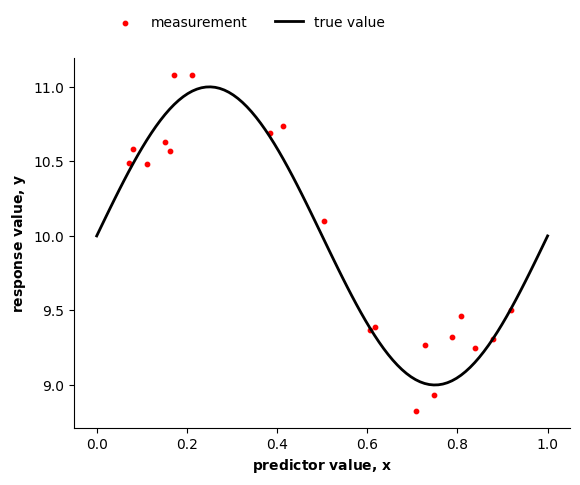

In [22]:
n = 20 # number of measurements

x      = np.linspace(0, 1, 100)
y_true = np.sin(2 * np.pi * x) + 10

σ      = 0.2

x_obs      = np.sort(np.random.choice(x, n, replace=False))
y_observed = (np.sin(2 * np.pi * x_obs) + 10) + σ * np.random.normal(0, 1, x_obs.shape)

fig, ax = plt.subplots()
ax.scatter(x_obs, y_observed, color='red', s=10, label='measurement')
ax.plot(x, y_true, color='k', lw=2, label='true value')

ax.set_xlabel("predictor value, $\mathbf{x}$", weight='bold')
ax.set_ylabel("response value, $\mathbf{y}$", weight='bold')

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.05, 1.15), ncol=2)

ax.get_ylim()

fig.savefig(os.path.join("figures", "bias_variance", "sin.png"), dpi=300, bbox_inches='tight')

In [23]:
def residual_sum_of_squares(y, y_hat):
    return np.sum((y - y_hat) ** 2)

def normalize_predictor(x):
    return (x - np.mean(x)) / np.std(x)



In [24]:

def predict(x, d, beta):        # Plot polynomial fit
    y = np.array(x*0)

    for j in range(d+1):
        y = y + beta[j]*x**j
    return y

def linear_pol_fit(x_obs, y_observed, d):
    n = x_obs.shape[0]

    x_mat       = np.matrix(np.zeros((n, d+1)))
    for i in range(n):
        for j in range(d+1):
            x_mat[i, j] = x_obs[i] ** j

    y_vec = np.matrix(y_observed).T
    beta = (x_mat.T * x_mat).I  * x_mat.T * y_vec

    return predict(x_obs, d, beta), beta




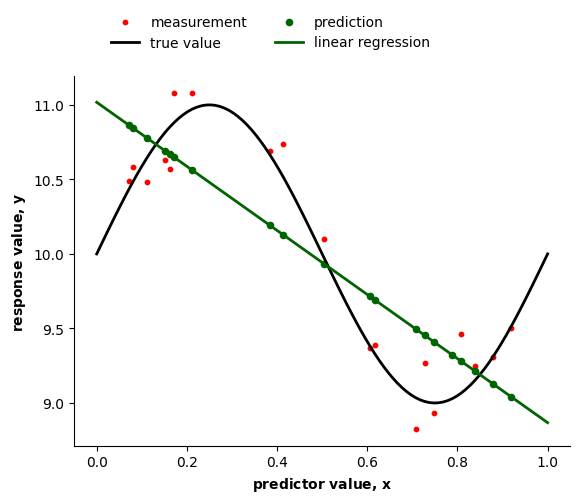

In [25]:
y_hat_all, beta = linear_pol_fit(x_obs, y_observed, 1)
y_all           = predict(x, 1, beta)



fig, ax = plt.subplots()
ax.scatter(x_obs, y_observed, color='red', s=10, label='measurement')
ax.plot(x, y_true, color='k', lw=2, label='true value')


ax.scatter(x_obs, np.array(y_hat_all), color='darkgreen', s=20, label='prediction')
ax.plot(x, y_all.T, color='darkgreen', lw=2, label='linear regression')


ax.set_xlabel("predictor value, $\mathbf{x}$", weight='bold')
ax.set_ylabel("response value, $\mathbf{y}$", weight='bold')

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.05, 1.2), ncol=2)

ax.get_ylim()

fig.savefig(os.path.join("figures", "bias_variance", "lin_reg.png"), dpi=300, bbox_inches='tight')

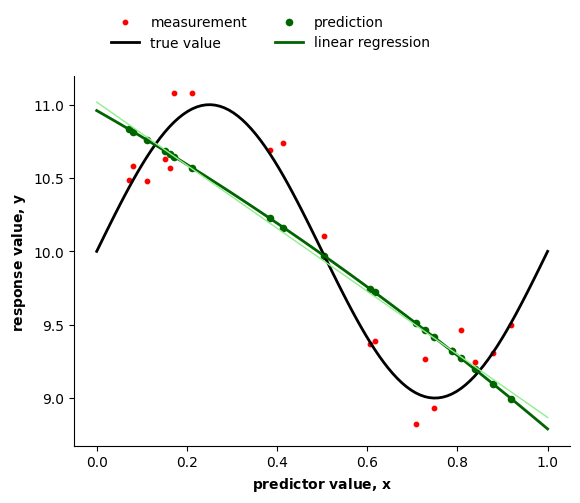

In [26]:
y_hat_all, beta = linear_pol_fit(x_obs, y_observed, 2)
y_all           = predict(x, 2, beta)


fig, ax = plt.subplots()
ax.scatter(x_obs, y_observed, color='red', s=10, label='measurement')
ax.plot(x, y_true, color='k', lw=2, label='true value')

ax.scatter(x_obs, np.array(y_hat_all), color='darkgreen', s=20, label='prediction')
ax.plot(x, y_all.T, color='darkgreen', lw=2, label='linear regression')

y_all           = predict(x, 1, linear_pol_fit(x_obs, y_observed, 1)[1])
ax.plot(x, y_all.T, color='lightgreen', lw=1)



ax.set_xlabel("predictor value, $\mathbf{x}$", weight='bold')
ax.set_ylabel("response value, $\mathbf{y}$", weight='bold')

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.05, 1.2), ncol=2)

ax.get_ylim()

fig.savefig(os.path.join("figures", "bias_variance", "lin_reg_sq.png"), dpi=300, bbox_inches='tight')

In [27]:
max_degree = 9

d_search = np.arange(0, max_degree+1, 2)

rss_ave   = np.full(len(d_search), np.nan)
rss_norm  = np.full(len(d_search), np.nan)
y_hat_all = np.zeros((n, len(d_search)))
y_all     = np.zeros((x.shape[0], len(d_search)))

for id, d in enumerate(d_search):

    y_hat_all[:, id], beta = linear_pol_fit(x_obs, y_observed, d)
    y_all[:, id]           = predict(x, d, beta)

    rss                    = residual_sum_of_squares(y_observed, y_hat_all[:, id])
    rss_ave[id]            = rss / n
    rss_norm[id]           = rss / (n-d-1)

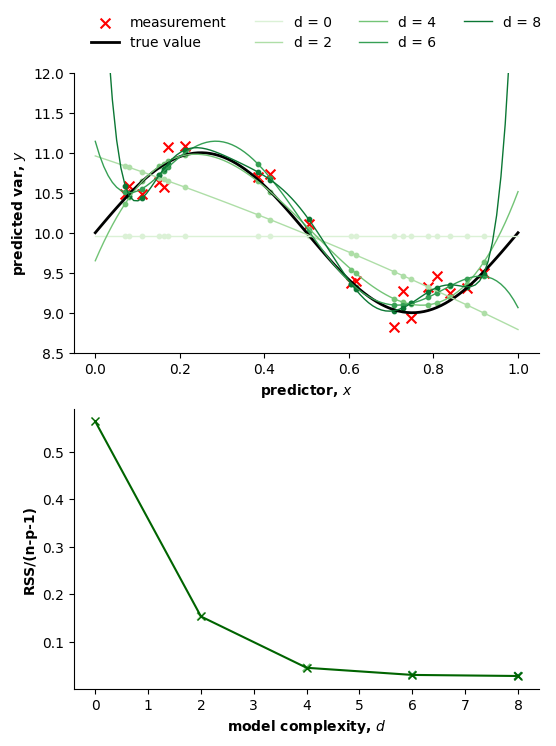

In [28]:
import seaborn as sns
colors = sns.color_palette("Greens", len(d_search))

fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[1].scatter(d_search, rss_norm, fc=colors, s=30, marker="x")
ax[1].plot(d_search, rss_norm, c="darkgreen", marker="x")

ax[0].scatter(x_obs, y_observed, color='red', s=50, label='measurement' , marker="x")
ax[0].plot(x, y_true, color='k', lw=2, label='true value')

for id, d in enumerate(d_search):
    ax[0].scatter(x_obs, y_hat_all[:, id], color=colors[id], s=10)

    ax[0].plot(x, y_all[:, id], color=colors[id], lw=1, label='d = {}'.format(d))

ax[0].legend(loc='upper left', frameon=False, bbox_to_anchor=(0.01, 1.25), ncol=4)

ax[0].set_xlabel("predictor, $x$", weight='bold')
ax[0].set_ylabel("predicted var, $y$", weight='bold')

#
ax[1].set_xlabel("model complexity, $d$", weight='bold')
ax[1].set_ylabel("RSS/(n-p-1)", weight='bold')

ax[0].set_ylim([8.5, 12.0])
for axi in ax.flatten():

    axi.spines["right"].set_visible(False)
    axi.spines["top"].set_visible(False)

fig.savefig(os.path.join("figures", "bias_variance", "polynomial_fit.png"), dpi=300, bbox_inches='tight')

In [29]:

max_degree = 10

d_search = np.arange(0, max_degree+1, 2)

σ      = 0.01

domain  = np.linspace(0, 1, 80)
train_frac = 80/100

n_train = int(train_frac * len(domain))
n_test  = len(domain) - n_train

train_index  = np.random.choice(len(domain), n_train, replace=True)
index_test   = set(range(len(domain))) - set(train_index)

test_indexes = np.random.choice(list(index_test), n_test, replace=True)

x_train = domain[train_index]
y_train = (np.sin(2 * np.pi * x_train) + 10) + σ * np.random.normal(0, 1, x_train.shape)

x_test = domain[test_indexes]
y_test = (np.sin(2 * np.pi * x_test) + 10) + σ * np.random.normal(0, 1, x_test.shape)

rss_train = np.full(len(d_search), np.nan)
rss_test  = np.full(len(d_search), np.nan)

y_hat_all = np.zeros((n_train, len(d_search)))

for id, d in enumerate(d_search):

    y_hat_all[:, id], beta = linear_pol_fit(x_train, y_train, d)

    y_hat_test = np.array(predict(x_test, d, beta))

    rss_train[id] = residual_sum_of_squares(y_train, y_hat_all[:, id]) / (len(y_train)-d-1)
    rss_test[id]  = residual_sum_of_squares(y_test, y_hat_test) / (len(y_test)-d-1)



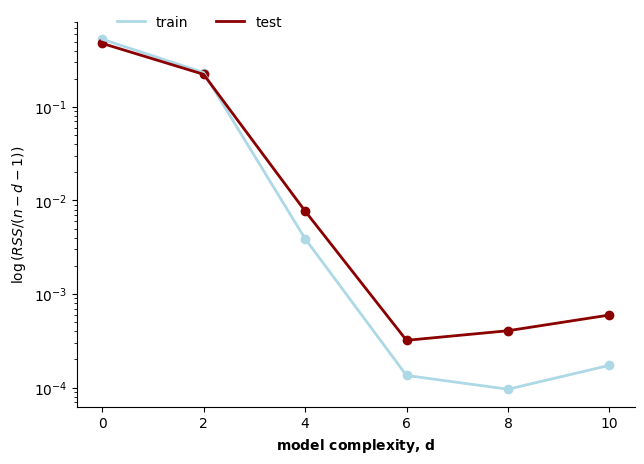

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(7.2, 5))
ax.scatter(d_search, rss_train, color="lightblue")
ax.scatter(d_search, rss_test,  color="darkred")

ax.plot(d_search, rss_train, color="lightblue", lw=2, label="train")
ax.plot(d_search, rss_test,  color="darkred", lw=2, label="test")

ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(0.05, 1.05), ncol=2)
ax.set_yscale("log")
ax.set_xlabel("model complexity, $\mathbf{d}$", weight='bold')
ax.set_ylabel(r"$\log \left(RSS/(n-d-1)\right)$", weight='bold')

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


In [31]:


def train_test_example(num_repeats=100, max_degree = 10, σ = 0.01):

    d_search = np.arange(0, max_degree+1)
    domain  = np.linspace(0, 1, 50)
    train_frac = 80/100

    n_train = int(train_frac * len(domain))
    n_test  = len(domain) - n_train

    rss_train = np.full((len(d_search), num_repeats), np.nan)
    rss_test  = np.full((len(d_search), num_repeats), np.nan)

    for i_rep in range(num_repeats):
        train_index  = np.random.choice(len(domain), n_train, replace=True)
        index_test   = set(range(len(domain))) - set(train_index)

        test_indexes = np.random.choice(list(index_test), n_test, replace=True)

        x_train = domain[train_index]
        y_train = (np.sin(2 * np.pi * x_train) + 10) + σ * np.random.normal(0, 1, x_train.shape)

        x_test = domain[test_indexes]
        y_test = (np.sin(2 * np.pi * x_test) + 10) + σ * np.random.normal(0, 1, x_test.shape)

        y_hat_all = np.zeros((n_train, len(d_search)))

        for id, d in enumerate(d_search):

            y_hat_all[:, id], beta = linear_pol_fit(x_train, y_train, d)

            y_hat_test = np.array(predict(x_test, d, beta))

            rss_train[id, i_rep] = residual_sum_of_squares(y_train, y_hat_all[:, id]) / (len(y_train)-d-1)
            rss_test[id, i_rep]  = residual_sum_of_squares(y_test, y_hat_test) / (len(y_test)-d-1)

    return rss_train, rss_test

In [32]:
d_max = 8
rss_train, rss_test = train_test_example(num_repeats=100, max_degree = d_max, σ = 0.01)

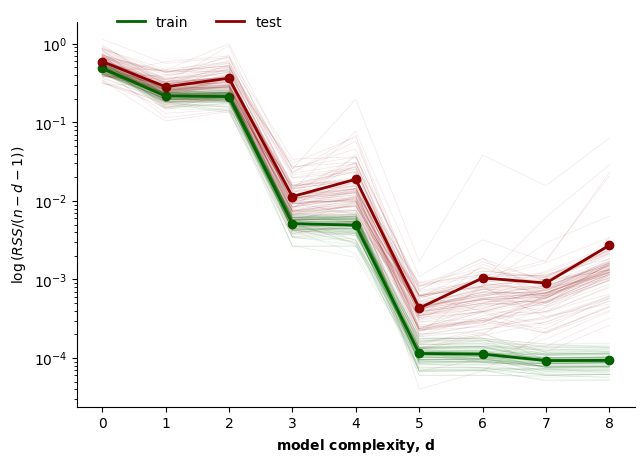

In [34]:
d_search = np.arange(0, d_max+1)

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5))
ax.scatter(d_search, rss_train.mean(-1), color="darkgreen")
ax.scatter(d_search, rss_test.mean(-1),  color="darkred")

ax.plot(d_search, rss_train, color="darkgreen", lw=0.5, alpha=0.1)
ax.plot(d_search, rss_test, color="darkred", lw=0.5, alpha=0.1)

ax.plot(d_search, rss_train.mean(-1), color="darkgreen", lw=2, label="train")
ax.plot(d_search, rss_test.mean(-1),  color="darkred", lw=2, label="test")

ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(0.05, 1.05), ncol=2)
ax.set_yscale("log")
ax.set_xlabel("model complexity, $\mathbf{d}$", weight='bold')
ax.set_ylabel(r"$\log \left(RSS/(n-d-1)\right)$", weight='bold')

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

fig.savefig(os.path.join("figures", "bias_variance", "bias_var_tradeoff.png"), dpi=300, bbox_inches='tight')